# Titanic dataset
## Introduction

Dataset yang digunakan merupakan data yang terkumpul dari penumpang kapal Titanic yang tenggelam pada tahun 1912 karena bertabrakan dengan gunung es. Ada beberapa variabel yang perlu dijelaskan dalam dataset tersebut:

##### Survived
Kondisi penumpang tersebut pasca-tabrakan (0=mati, 1=hidup)
##### Pclass
Kelas dari penumpang tersebut
##### SibSp
Jumlah saudara atau pasangan di kapal
##### Parch
Jumlah orang tua atau anak di kapal
##### Embarked
Pelabuhan penumpang tersebut naik (Cherbourg, Queenstown, Southampton)

* Name, Sex, Age, Ticket, dan Fare sudah intuitif

Tujuan dari model ini adalah menggunakan machine learning untuk mencari pola dari penumpang yang berhasil bertahan hidup setelah kapal karam dengan cara classification menggunakan Logistic Regression.

In [ ]:
# imports
# essentials
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# models
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.ensemble import VotingClassifier as VC
from sklearn.ensemble import BaggingClassifier as BC
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
# dataset split
from sklearn.model_selection import train_test_split

## Data cleaning and preprocessing

In [ ]:
# pengecekan data
data = pd.read_csv('titanic.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# banyak data yang kosong di Age dan Cabin
# ada 2 penumpang tanpa pelabuhan yang tercatat
# sekitar 38.4% penumpang bertahan hidup
# umur penumpang berada diantara 0.4 dan 80
# Sex, Ticket, Cabin, dan Embarked sebaiknya diubah menjadi value numerik supaya dapat dipakai

In [ ]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Age cleaning

In [ ]:
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

c:\Users\ADI CHRISTIAN\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

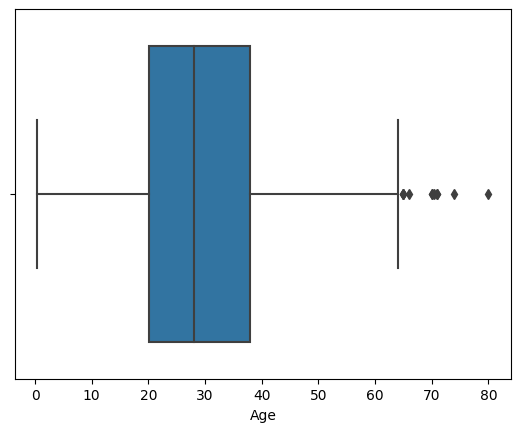

In [ ]:
# mencari outlier
sns.boxplot(data['Age'])

In [ ]:
data.loc[np.where(data['Age']>65)]['Age']

33     66.0
96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

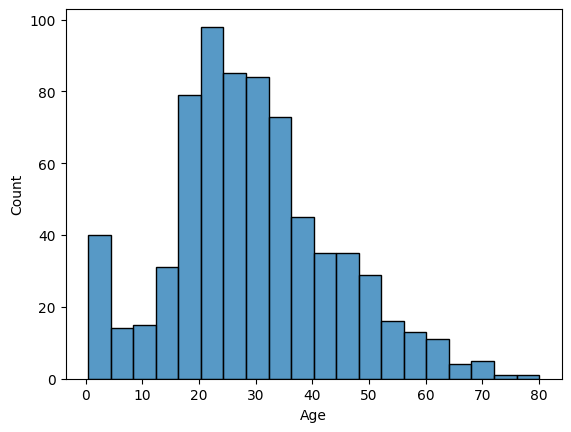

In [ ]:
# mencari distribusi
sns.histplot(data['Age'])

In [ ]:
# karena terdapat beberapa outlier dan data agak miring kita gunakan median untuk mengisi kekosongan
median = data['Age'].median()
data['Age'] = data['Age'].fillna(median).astype(int)
data['Age'].isna().sum()

0

### Embarked cleaning

In [ ]:
# Hanya ada 2 value yang hilang jadi bisa diisi dengan data yang paling banyak muncul
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
# paling banyak adalah S
data['Embarked'] = data['Embarked'].fillna('S')
data['Embarked'].isna().sum()

0

### Cabin cleaning

In [ ]:
data['Cabin'].describe()

count         204
unique        147
top       B96 B98
freq            4
Name: Cabin, dtype: object

In [ ]:
# 204 dari 891 ada isinya
# terlalu sedikit, lebih baik di drop saja
data = data.drop(columns=['Cabin'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(4)
memory usage: 73.2+ KB


### Preprocessing lainnya
- Beberapa variabel seperti Sex dan Embarked sebaiknya diubah menjadi nilai numerik
- PassengerId, Name, dan Ticket tidak penting (setiap value unique sehingga tidak menentukan apapun) maka dapat didrop
- Fare dan Age dapat dikategorikan
- SibSp dan Parch dapat digabungkan menjadi Fam (jumlah anggota keluarga)

In [ ]:
# mengubah Sex
sex = {'male':0, 'female':1}
data['Sex'] = data['Sex'].map(sex)
data['Sex'].describe()

count    891.000000
mean       0.352413
std        0.477990
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Sex, dtype: float64

In [ ]:
# mengubah Embarked
emb = {'S':0, 'C':1, 'Q':2}
data['Embarked'] = data['Embarked'].map(emb)
data['Embarked'].describe()

count    891.000000
mean       0.361392
std        0.635673
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        2.000000
Name: Embarked, dtype: float64

In [ ]:
data = data.drop(columns=['PassengerId','Name', 'Ticket'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    int32  
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(1), int32(1), int64(6)
memory usage: 52.3 KB


In [ ]:
# pengategorian Age
data.loc[ data['Age']<=10, 'Age'] = 0
data.loc[(data['Age']>10) & (data['Age']<=18), 'Age'] = 1
data.loc[(data['Age']>18) & (data['Age']<=27), 'Age'] = 2
data.loc[(data['Age']>27) & (data['Age']<=35), 'Age'] = 3
data.loc[(data['Age']>35) & (data['Age']<=50), 'Age'] = 4
data.loc[ data['Age']>50, 'Age'] = 5
data['Age'].value_counts()

3    337
2    198
4    153
1     75
5     64
0     64
Name: Age, dtype: int64

In [ ]:
# pengategorian Fare
data.loc[ data['Fare']<=8, 'Fare'] = 0
data.loc[(data['Fare']>8) & (data['Fare']<=12), 'Fare'] = 1
data.loc[(data['Fare']>12) & (data['Fare']<=25), 'Fare'] = 2
data.loc[(data['Fare']>25) & (data['Fare']<=50), 'Fare'] = 3
data.loc[(data['Fare']>50) & (data['Fare']<=100), 'Fare'] = 4
data.loc[ data['Fare']>100, 'Fare'] = 5
data['Fare'] = data['Fare'].astype(int)
data['Fare'].value_counts()

0    241
2    183
3    174
1    133
4    107
5     53
Name: Fare, dtype: int64

In [ ]:
# Penggabungan SibSp dan Parch
data['Fam'] = data['SibSp']+data['Parch']
data = data.drop(columns=['SibSp','Parch'])
data['Fam'].describe()

count    891.000000
mean       0.904602
std        1.613459
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       10.000000
Name: Fam, dtype: float64

In [ ]:
# hasil setelah preprocessing
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Fam
0,0,3,0,2,0,0,1
1,1,1,1,4,4,1,1
2,1,3,1,2,0,0,0
3,1,1,1,3,4,0,1
4,0,3,0,3,1,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int32
 4   Fare      891 non-null    int32
 5   Embarked  891 non-null    int64
 6   Fam       891 non-null    int64
dtypes: int32(2), int64(5)
memory usage: 41.9 KB


## Algoritma Machine Learning

In [ ]:
# split dataset untuk testing dan training
X = data.loc[:, ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Fam']]
y = data.loc[:, ['Survived']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, shuffle=True)

### Statsmodels Logistic Regression

In [ ]:
logreg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.435247
         Iterations 6


In [ ]:
logreg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      706
Method:                           MLE   Df Model:                            5
Date:                Sun, 22 Oct 2023   Pseudo R-squ.:                  0.3369
Time:                        22:49:11   Log-Likelihood:                -309.90
converged:                       True   LL-Null:                       -467.31
Covariance Type:            nonrobust   LLR p-value:                 6.488e-66
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Pclass        -0.5575      0.084     -6.625      0.000      -0.722      -0.393
Sex            2.6752      0.222     12.049      0.000       2.240       3.110
Age           -0.3324      0.077     -4.337      0.000      -0.483      -0.182
Fare           0.3977      0.077      5.165      0.000       0.247       0.549
Embarked       0.1344      0.165      0.814      0.416      -0.189       0.458
Fam           -0.3442      0.084     -4.078      0.000      -0.510      -0.179
==============================================================================
"""

Menurut p-value (`P>|z|`), semua predictor yang ada kecuali pelabuhan keberangkatan berhubungan dengan kemungkinan hidup penumpang. Hal ini bisa jadi karena variabel yang kurang penting (PassengerId, Name, Ticket) sudah dibuang pada saat preprocessing data.
<br>
Analisa data dan penalaran:
- Semakin rendah kelas semakin mungkin hidup (penumpang kelas 1 memiliki akses ke fasilitas kapal terbaik)
- Perempuan lebih mungkin hidup daripada laki-laki (saat evakuasi perempuan diutamakan)
- Orang muda lebih banyak yang hidup (anak-anak diutamakan untuk evakuasi, orang tua lebih sulit untuk bergerak sehingga tertinggal di kapal)
- Semakin tinggi harga tiket, semakin besar kemungkinan hidup (harga tiket yang tinggi menunjukkan fasilitas yang lebih memadai, mirip Pclass)
- Embarked kurang akurat sebagai prediktor (pelabuhan yang dijadikan variabel bukanlah sesuatu yang linear, namun merupakan suatu kategori yang dijadikan linear untuk diproses program)
- Semakin sedikit keluarga semakin besar kemungkinan hidup (Tidak perlu mencari/menolong satu sama lain?)

### SciKit Models
Keakuratan hasil prediksi model direpresentasikan dalam persentase, acc_sco untuk keakuratan dengan dataset test, dan acc_log untuk keakuratan dengan dataset train.
(acc_sco dan acc_log menggunakan perbandingan true positive)

In [ ]:
logReg = LogisticRegression()
logReg.fit(X_train, y_train.values.ravel())
y_pred = logReg.predict(X_test)
acc_sco = round(accuracy_score(y_test, y_pred)*100, 2)
acc_log = round(logReg.score(X_train, y_train)*100, 2)
print(acc_sco,'%')
print(acc_log,'%')

79.33 %
81.32 %


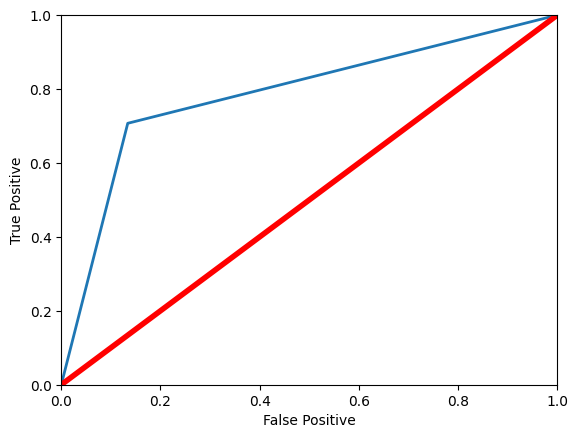

In [ ]:
# roc curve
fp, tp, thresholds = roc_curve(y_test, y_pred)

plt.plot(fp, tp, linewidth=2)
plt.plot([0, 1], [0, 1], 'r', linewidth=4)
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive')
plt.ylabel('True Positive')

plt.show()

In [ ]:
lda = LDA()
lda.fit(X_train, y_train.values.ravel())
y_pred = lda.predict(X_test)
acc_sco = round(accuracy_score(y_test, y_pred)*100, 2)
acc_log = round(lda.score(X_train, y_train)*100, 2)
print(acc_sco,'%')
print(acc_log,'%')

80.45 %
80.62 %


In [ ]:
qda = QDA()
qda.fit(X_train, y_train.values.ravel())
y_pred = qda.predict(X_test)
acc_sco = round(accuracy_score(y_test, y_pred)*100, 2)
acc_log = round(qda.score(X_train, y_train)*100, 2)
print(acc_sco,'%')
print(acc_log,'%')

78.77 %
81.74 %


In [ ]:
naBa = GaussianNB()
naBa.fit(X_train, y_train.values.ravel())
y_pred = naBa.predict(X_test)
acc_sco = round(accuracy_score(y_test, y_pred)*100, 2)
acc_log = round(naBa.score(X_train, y_train)*100, 2)
print(acc_sco,'%')
print(acc_log,'%')

77.65 %
77.81 %


## Resampling methods

Validation Set


In [4]:
print("Test")

Test


K-Fold Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
import numpy as np
import pandas as pd

# Contoh: Data set (ganti dengan data set yang sesuai)
data = pd.read_csv('https://raw.githubusercontent.com/Nyanderfull/ML_Titinik/main/titanic.csv?token=GHSAT0AAAAAACIXZ3SR35RRXUZQIT3GGOXAZJVI3DQ')
X = data.drop(columns=['Survived'])
y = data['Survived']

model = RandomForestRegressor(n_estimators=100, random_state=42)

num_folds = 5

# Menggunakan K-Fold Cross-Validation
kfold = KFold(n_splits=num_folds, random_state=42)
mse_scores = -cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')

# Menghitung rata-rata MSE
average_mse = np.mean(mse_scores)
print(f'Rata-rata MSE menggunakan K-Fold Cross-Validation: {average_mse}')

Menggunakan Validation Set:
Bias:
Pro: Evaluasi model menggunakan data validasi dapat memberikan perkiraan kinerja yang lebih akurat pada data baru karena model diuji pada data independen.
Kontra: Jika data validasi tidak mencakup semua variasi dalam data, evaluasi bisa menjadi bias dan tidak mencerminkan kinerja sebenarnya pada data yang tidak terlihat.
Varians:
Pro: Evaluasi pada validation set akan memberikan hasil yang lebih konsisten jika pembagian data dilakukan dengan benar.
Kontra: Hasil evaluasi dapat bervariasi tergantung pada pembagian data. Jika pembagian tidak beruntung, hasil evaluasi bisa sangat bervariasi.
Menggunakan K-Fold Cross-Validation:
Bias:
Pro: Dengan menggunakan K-Fold Cross-Validation, model dinilai pada berbagai subset data. Ini membantu mengurangi bias karena model dinilai pada berbagai data yang berbeda.
Kontra: Nilai rata-rata yang dihasilkan dari K-Fold Cross-Validation dapat sedikit lebih mendekati kinerja sebenarnya pada data baru, terutama jika jumlah fold cukup besar.
Varians:
Pro: Hasil evaluasi dari K-Fold Cross-Validation memberikan perkiraan variasi kinerja model pada data baru. Ini membantu memahami sejauh mana model dapat bervariasi dalam menghadapi data baru.
Kontra: Proses cross-validation membutuhkan waktu dan komputasi yang lebih besar dibandingkan dengan pendekatan validation set, terutama jika jumlah fold besar.
Kesimpulan:

Penggunaan validation set memberikan evaluasi yang cepat dan sederhana, namun memiliki potensi bias dan variasi yang tinggi tergantung pada pembagian data.
K-Fold Cross-Validation memberikan estimasi yang lebih stabil terhadap kinerja model, tetapi membutuhkan waktu dan komputasi lebih besar. Hal ini membantu memahami sejauh mana model dapat beradaptasi dengan data baru dan memberikan estimasi yang lebih baik terhadap variasi performa pada data yang belum terlihat.
Pilihan antara validation set dan K-Fold Cross-Validation tergantung pada kebutuhan spesifik proyek Anda. Jika waktu dan komputasi tidak terlalu masalah, K-Fold Cross-Validation memberikan perkiraan yang lebih dapat diandalkan dan membantu mengurangi potensi bias serta variasi dalam evaluasi model.


## Other Method: Pasting - QDA

In [ ]:
y_trainNp = np.array(y_train).ravel()
y_testNp = np.array(y_test).ravel()

In [ ]:
pasting = BC(qda, n_estimators=1000, random_state=2, bootstrap=True)
pasting.fit(X_train, y_trainNp)
y_pred = pasting.predict(X_test)

# Hitung accuracy
acc_sco = round(accuracy_score(y_testNp, y_pred)*100, 2)
acc_log = round(pasting.score(X_train, y_trainNp)*100, 2)
print(acc_sco,'%')
print(acc_log,'%')

78.77 %
81.74 %


Memakai Pasting juga kurang membantu, karena hasil accuracy score dari QDA lebih baik daripada ensemble.

## Other Method: Decision Tree

In [ ]:
decision_tree = DT(max_depth=10)
decision_tree.fit(X_train, y_trainNp)
y_pred = decision_tree.predict(X_test)

# Hitung accuracy
acc_sco = round(accuracy_score(y_testNp, y_pred)*100, 2)
acc_log = round(decision_tree.score(X_train, y_trainNp)*100, 2)
print(acc_sco,'%')
print(acc_log,'%')

77.65 %
89.89 %


Memakai Decision Tree terkadang memberi hasil yang lebih baik daripada LDA/QDA/Logistic Regression/Naive Bayes

## Other Method: Pasting - Decision Tree

In [ ]:
pasting = BC(decision_tree, n_estimators=1000, random_state=2, bootstrap=True)
pasting.fit(X_train, y_trainNp)
y_pred = pasting.predict(X_test)

# Hitung accuracy
acc_sco = round(accuracy_score(y_testNp, y_pred)*100, 2)
acc_log = round(pasting.score(X_train, y_trainNp)*100, 2)
print(acc_sco,'%')
print(acc_log,'%')

76.54 %
90.17 %


Pasting pada Decision Tree umumnya memberi hasil accuracy score sama seperti Decision Tree, walau Accuracy

## Other Method: Random Forest

In [ ]:
random_forest = RFC(n_estimators=100, random_state=2)
random_forest.fit(X_train, y_trainNp)
y_pred = random_forest.predict(X_test)

# Hitung accuracy
acc_sco = round(accuracy_score(y_testNp, y_pred)*100, 2)
acc_log = round(random_forest.score(X_train, y_trainNp)*100, 2)
print(acc_sco,'%')
print(acc_log,'%')

77.65 %
90.17 %


## Other Method: Ensemble

In [ ]:
# Memakai Ensemble
ensemble = VC(estimators=[
    ('lr', logReg),
    ('lda', lda),
    ('qda', qda),
    ('nb', naBa),
    ('p-qda', pasting),
    ('decision', decision_tree),
    ('random-forest', random_forest)
    ], voting='soft')
ensemble.fit(X_train, y_trainNp)
y_pred = ensemble.predict(X_test)

# Hitung accuracy
acc_sco = round(accuracy_score(y_testNp, y_pred)*100, 2)
acc_log = round(ensemble.score(X_train, y_trainNp)*100, 2)
print(acc_sco,'%')
print(acc_log,'%')

81.56 %
87.5 %


Memakai Ensemble ternyata baik karena accuracy score bagus, berarti baik di training data